* * *
<pre> NYU Paris            <i> Machine Learning - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab: Dimension Reduction </h1>

<pre align="left"> June 13th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- Understand PCA deeply and see when it can be useful or not
- Evaluate other dimension reduction methods

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# temp.shape

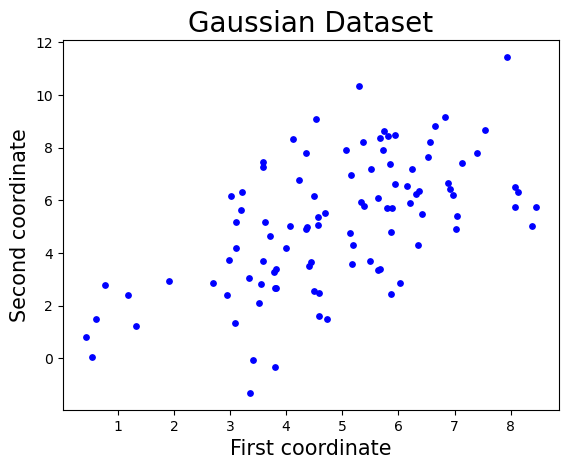

In [4]:
# Sample one dataset with (correlated) Gaussian distribution
np.random.seed(0)

# Size of data
n_samples = 100
n_dim = 2

# Mean vector of the dataset
mean = 5 *  np.ones(n_dim)

# Sample covariance matrix from a Wishart distribution
temp = np.random.randn(n_dim, n_dim)
cov = temp@temp.T

X = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(X[:, 0], X[:, 1], s=15, c='b')
plt.xlabel('First coordinate', size=15)
plt.ylabel('Second coordinate', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

In [5]:
cov_mat = np.zeros((X[0].shape[0],X[0].shape[0]))
for i in X:
    x = i.reshape(-1,1)
    mat = x@x.T
    cov_mat +=mat
cov_mat = cov_mat/len(X)


### Question 1:

Implement your own PCA algorithm.

In [7]:
class MyPCA(object):

    def __init__(self, n_components):
        self.n_components = n_components
    

    def fit(self, X):
        mean_ = X.mean(axis = 0)
        self.mean_ = mean_
        X_centered = X - mean_
        
        cov_matrix = self.cov_matrix_(X_centered)  # to do
        
        eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

        #sort the eigenvalues in descending order
        sorted_index = np.argsort(eigen_values)[::-1]

        self.eigenvalues = eigen_values[sorted_index] # To do

        #similarly sort the eigenvectors
        self.eigenvectors = eigen_vectors[:,sorted_index]
        self.eigenvector_subset =self.eigenvectors [:, :self.n_components]
        
    def cov_matrix_(self, X):
        n_samples = X.shape[0]  # Number of data points
        
        # Covariance matrix using matrix multiplication (X^T X) / n_samples
        cov_mat = (X.T @ X) / n_samples
        return cov_mat
        

    def transform(self, Z):
        Z_centered = Z - self.mean_  # Center the new data using the stored mean
        return Z_centered @ self.eigenvector_subset

### Question 2

Apply PCA on the Gaussian dataset

In [9]:
pca_gaussian = MyPCA(2)

In [10]:
pca_gaussian.fit(X)

In [11]:
pca_gaussian.transform(X)

array([[ 5.23357913, -1.28698777],
       [ 2.68151968, -0.28332925],
       [-0.23562192,  0.36938119],
       [ 0.41031252,  1.7365892 ],
       [ 2.15225122,  0.05649486],
       [ 1.27242012,  0.30837168],
       [ 4.18029015, -0.31465035],
       [ 0.95175075, -1.23700721],
       [-6.98510844,  0.5113825 ],
       [ 2.46534563, -1.05346342],
       [ 6.35614297, -1.87573163],
       [ 0.19410491, -0.39327076],
       [ 4.23143495,  1.8537758 ],
       [ 0.47589054,  0.3455888 ],
       [-2.3155985 , -2.77866552],
       [-0.90058177,  0.02334204],
       [ 3.40785086,  1.48720833],
       [-0.99388461, -0.57261851],
       [-2.77654626, -2.06470098],
       [-4.69792434,  2.24858895],
       [-1.32602013, -0.75681974],
       [-3.41123597,  0.76303849],
       [-4.37221022, -0.54305518],
       [-2.41500197,  0.28301188],
       [-1.30464686, -1.71727369],
       [-0.02971702,  0.39759398],
       [ 0.23504408,  0.24147608],
       [-1.67158585, -0.66815771],
       [-1.77664305,

### Question 3

Verify that your transformed data are decorrelated. What do you observe?

In [13]:
transformed_data = pca_gaussian.transform(X)

# Calculate the covariance matrix of the transformed data
cov_matrix_transformed = np.cov(transformed_data.T)

# Print the covariance matrix
print("Covariance matrix of transformed data:")
print(cov_matrix_transformed)

Covariance matrix of transformed data:
[[ 7.78619202e+00 -6.72862439e-17]
 [-6.72862439e-17  1.67113936e+00]]


We see that the diagnonal elements are non zero and the non diagonal elements are nearly 0 which indicate that the transformed data are decorrelated.

### Question 4

Visualize your transformed data after PCA.

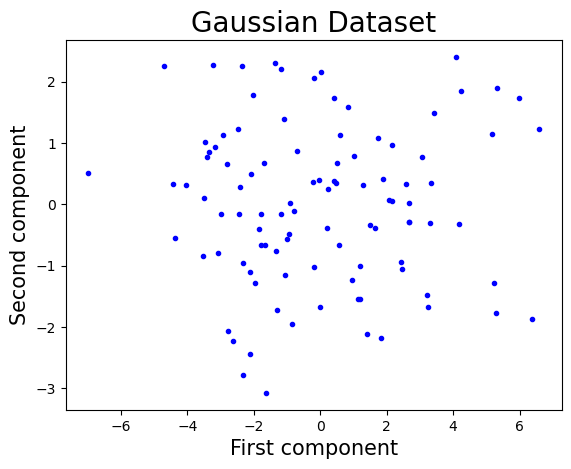

In [16]:
# to do
plt.scatter(transformed_data[:,0],transformed_data[:,1], color='b', marker='.')
plt.xlabel('First component', size=15)
plt.ylabel('Second component', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

### Question 5

Compare your algorithm with the one in sklearn. You can check the covariance matrix of the transformed data. Is this the same than yours? What do you observe?

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

# Fit the model to the data and perform dimensionality reduction
pca.fit(X)

# Transform the data to the lower dimensional space (2D in this case)
transformed_data = pca.transform(X)

# Output the transformed data
print("Transformed data (after PCA):")
# print(transformed_data)

# Covariance matrix of the transformed data (to check decorrelation)
cov_matrix_transformed = np.cov(transformed_data.T)
print("\nCovariance matrix of transformed data:")
print(cov_matrix_transformed)

Transformed data (after PCA):

Covariance matrix of transformed data:
[[ 7.78619202e+00 -6.63890940e-16]
 [-6.63890940e-16  1.67113936e+00]]


The diagonal elements are the same as mine. The non diagonal elements, are very close to 0 in both the implementation.

### Bonus Question

Compare the computational time of both algorithms, what do you observe? Why?

In [22]:
import time

In [23]:
start_time = time.time()
my_pca = MyPCA(n_components=2)
my_pca.fit(X)
my_pca.transform(X)
custom_pca_time = time.time() - start_time

# --- Measure time for scikit-learn PCA ---
start_time = time.time()
sklearn_pca = PCA(n_components=2)
sklearn_pca.fit(X)
sklearn_pca.transform(X)
sklearn_pca_time = time.time() - start_time

# Print the times
print(f"Time for custom PCA: {custom_pca_time:.5f} seconds")
print(f"Time for scikit-learn PCA: {sklearn_pca_time:.5f} seconds")

Time for custom PCA: 0.00026 seconds
Time for scikit-learn PCA: 0.00089 seconds


when running the code multiple times, I observed that sometimes the custom PCA is faster whereas sometimes sklearn implementation is faster.

### Question 6

Let's apply the PCA on a (easy) classification real-world dataset. Apply PCA with 2 components and visualize the dataset with different colors for each class.

In [26]:
from sklearn import datasets

(150, 4)
(150,)


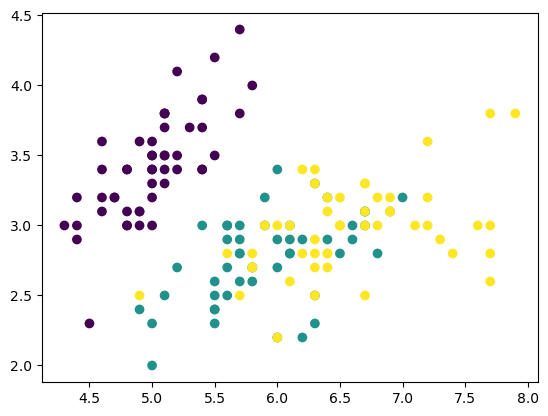

In [27]:
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target
print(X_iris.shape)
print(y_iris.shape)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

In [28]:
X_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

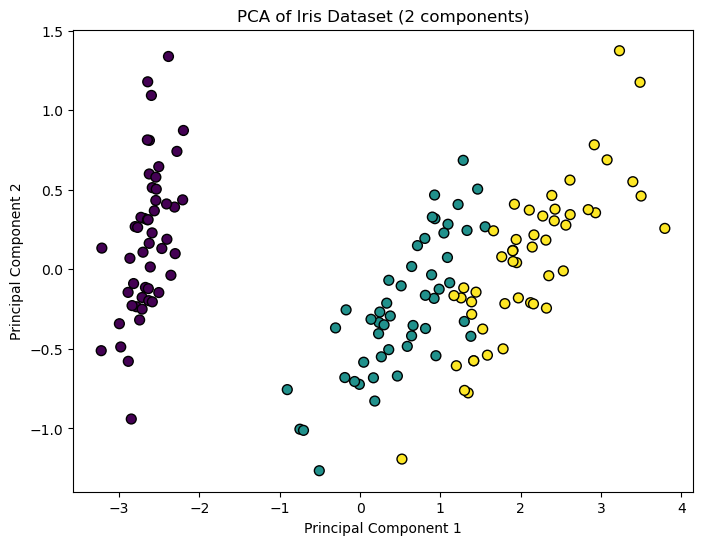

In [29]:
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris)

# Plot the transformed data
plt.figure(figsize=(8,6))
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris, cmap='viridis', edgecolor='k', s=50)

plt.title('PCA of Iris Dataset (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Question 7

Use a KNN algorithm and perform it on the dataset. Use different combinations of parameters using the GridSearchCV function.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
# parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# Performinf GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# 9. Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation accuracy:  0.9583333333333334
Test set accuracy:  1.0


### Question 8

Use a PCA first and then apply again the classification algorithm. Observe the best score, is the PCA improve the results? Which explanation can you give?

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation accuracy:  0.9583333333333333
Test set accuracy:  0.9666666666666667


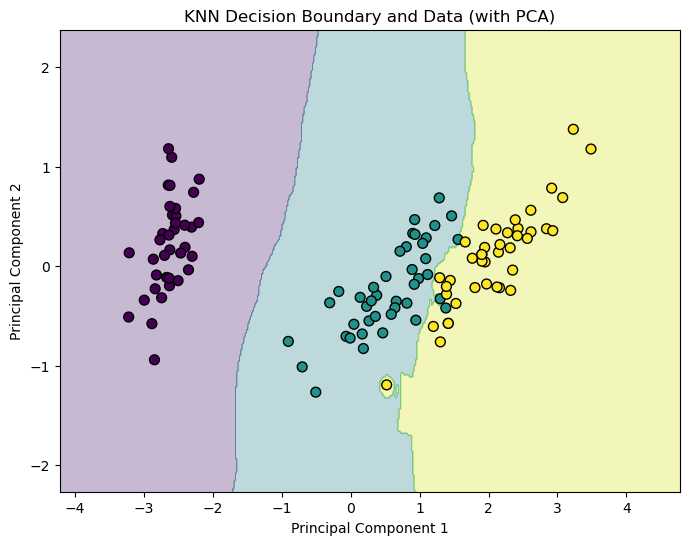

In [34]:
# Apply PCA to reduce the data to 2D 
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_iris_pca, y_iris, test_size=0.2, random_state=43)

# Define the KNN model
knn = KNeighborsClassifier()

#  Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [1,3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'], 
}

# Perform GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Evaluate the model on the test set using the best parameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)

# Visualize the decision boundary of the best model 
plt.figure(figsize=(8,6))

# Create a mesh grid to plot decision boundaries
h = .02  # Step size in the mesh grid
x_min, x_max = X_iris_pca[:, 0].min() - 1, X_iris_pca[:, 0].max() + 1
y_min, y_max = X_iris_pca[:, 1].min() - 1, X_iris_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundary
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("KNN Decision Boundary and Data (with PCA)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The test accuracy for the PCA data is slightly less than the raw data. The reason would be the loss of information due to dimensionality reduction which reduces accuracy in the test set. However, the best-cross validation accuracy for both the methods are same.

### Question 9

How features influence the first components (in term of variance)? You can answer this question by inspecting the weights in the first component.

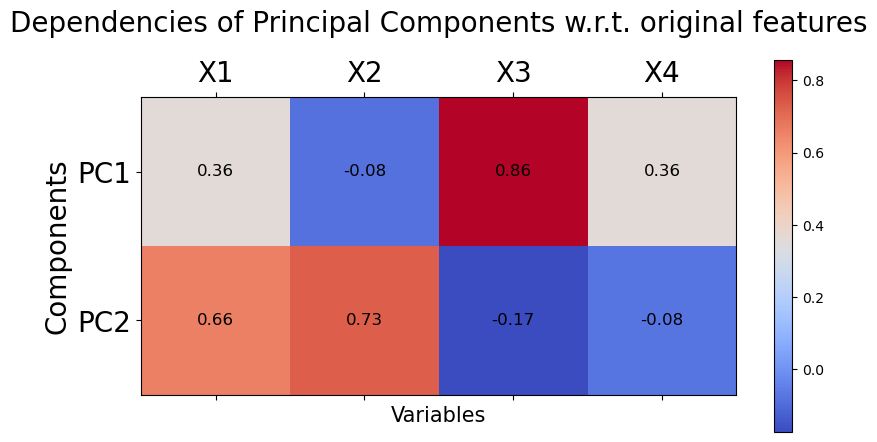

In [36]:
plt.matshow(pca.components_[:2], cmap='coolwarm')
plt.ylabel('Components', size=20)
plt.xlabel('Variables', size=15)
for i in range(4):
    for j in range(2):
        plt.text(i, j, "%0.2f" % pca.components_[j, i], size=12, color='black', ha="center", va="center")
plt.colorbar()
xlabels = ['X1', 'X2', 'X3', 'X4']
plt.xticks(range(4), xlabels, size=20)
ylabels = ['PC1', 'PC2']
plt.yticks(range(2), ylabels, size=20)
plt.title('Dependencies of Principal Components w.r.t. original features', size=20, pad=20)
plt.show()

PC1 is strongly influenced by X3, and moderately by X1 and X4.

PC2 is primarily driven by X2 and X1.

X3 and X4 contribute less to PC2, with both having a negative effect.

### Bonus Question

Create a pipeline with KNN, classification trees, RandomForest and SVM. Perform the Question 7/8 for these 4 classifiers. What do you observe?

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifier configurations
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'model__max_depth': [2, 3, 4, 5],
            'model__criterion': ['gini', 'entropy']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [10, 50, 100],
            'model__max_depth': [2, 3, 5],
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }
    }
}

# Function to run GridSearch with and without PCA
results = []

for name, cfg in models.items():
    print(f"\n Running GridSearch for: {name}")

    # Without PCA 
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', cfg['model'])
    ])

    grid = GridSearchCV(pipe, cfg['params'], cv=5)
    grid.fit(X_train, y_train)
    acc_no_pca = grid.best_score_
    best_model_no_pca = grid.best_estimator_
    test_acc_no_pca = accuracy_score(y_test, best_model_no_pca.predict(X_test))

    # --- With PCA ---
    pipe_pca = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
        ('model', cfg['model'])
    ])

    grid_pca = GridSearchCV(pipe_pca, cfg['params'], cv=5)
    grid_pca.fit(X_train, y_train)
    acc_with_pca = grid_pca.best_score_
    best_model_with_pca = grid_pca.best_estimator_
    test_acc_with_pca = accuracy_score(y_test, best_model_with_pca.predict(X_test))

    # Save results
    results.append({
        'Model': name,
        'CV Accuracy (No PCA)': acc_no_pca,
        'Test Accuracy (No PCA)': test_acc_no_pca,
        'CV Accuracy (With PCA)': acc_with_pca,
        'Test Accuracy (With PCA)': test_acc_with_pca
    })

# Show results in a table
import pandas as pd
df_results = pd.DataFrame(results)
print("Results:")
print(df_results)



 Running GridSearch for: KNN

 Running GridSearch for: DecisionTree

 Running GridSearch for: RandomForest

 Running GridSearch for: SVM
Results:
          Model  CV Accuracy (No PCA)  Test Accuracy (No PCA)  \
0           KNN              0.958333                     1.0   
1  DecisionTree              0.941667                     1.0   
2  RandomForest              0.950000                     1.0   
3           SVM              0.958333                     1.0   

   CV Accuracy (With PCA)  Test Accuracy (With PCA)  
0                0.933333                  0.866667  
1                0.925000                  0.900000  
2                0.900000                  0.900000  
3                0.925000                  0.900000  


Both the test and criss validation accuracy decrease with PCA for all methods because the dimension of data is reduced and hence some information is lost which might contribute to lower accuracy in both cases. KNN performs the worst of all.

### Question 10

Time to apply PCA on a high dimensional dataset.

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
X_d = digits.data
y_d = digits.target

# print(X_d.shape)
# print(list(set(y_d)))

### Question 11

Now, you will have to reduce the dimension. The main question is: how to choose the number of components? Propose a method to determine a relevant number of components to keep.

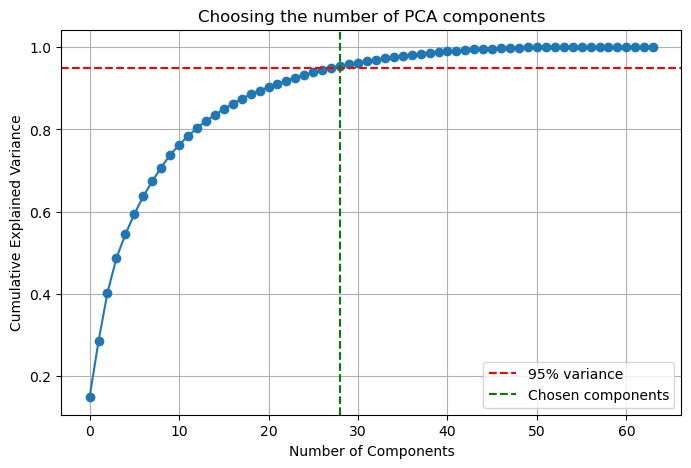

In [45]:
pca = PCA()
pca.fit(X_d)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='g', linestyle='--', label='Chosen components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the number of PCA components')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
m = np.argmax(cumulative_variance >= 0.95)+1 #indices start at 0, so we add 1
print(m)

29


We observe the cumulative explained variance for the PCA. Observing in the figure, we see that the variance doesn't increase much after the 29th point. We could have extended it further to around 40. But 29 works fine by when the cumulative variance is 95%. Hence, we choose to keep 29 components.

### Question 12

Run PCA on the handwritten digits data reducing its dimension from 64 to 2. Visualise digits in dimension two. Is dimension two seems enough to represent keep information of data?

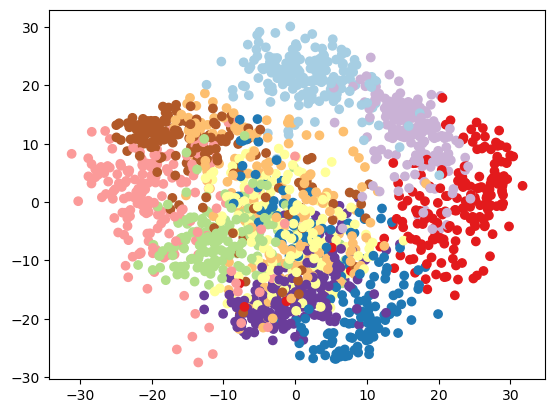

In [49]:
from matplotlib import cm


pca = PCA(n_components=2)
vis = pca.fit_transform(digits.data)
# print(vis)
# print(vis.shape)
colors = cm.Paired(np.linspace(0., 1., 10)) # list of 10 colors

colors_all = colors[digits.target]
plt.scatter(vis[:, 0], vis[:, 1], c=colors_all)
plt.show()

Dimension 2 doesn't seem enough to represent keep information of data but it still gives some information about the variance in the data.

In [51]:
# set(digits.target)

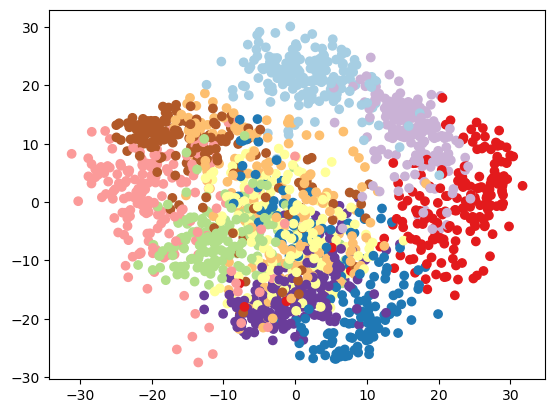

In [52]:
pca = PCA(n_components=30)
vis = pca.fit_transform(digits.data)
colors = cm.Paired(np.linspace(0., 1., 10)) # list of 10 colors

colors_all = colors[digits.target]
plt.scatter(vis[:, 0], vis[:, 1], c=colors_all)
plt.show()

### Question 13

Perform a KNN algorithm on the raw data and on the projected data. What do you observe in terms of accuracy?

In [54]:
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###  KNN on RAW DATA
knn_raw = KNeighborsClassifier(n_neighbors=3)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy on Raw Data (64D): {acc_raw:.4f}")

### KNN on PCA-reduced DATA 
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy on PCA Data (2D): {acc_pca:.4f}")

Accuracy on Raw Data (64D): 0.9889
Accuracy on PCA Data (2D): 0.6074


I observe that the accuracy of the Projected Data is low. It makes sense as projecting a 64 dimension data to a lower 2d data results in a huge loss of information. However, the accuracy of 60% suggests that tweaking the dimension of projected data and increasing it could help us gain good accuracy while not performing the calculation on the 64d data itself.

### Bonus Question

Apply other reduction dimension methods (not seen in class) such as Kernel PCA (choose one kernel), Independant Component Analysis (ICA) and t-SNE. Visualize their projection in dimension two.

In [57]:
from sklearn.decomposition import FastICA, PCA, KernelPCA
from sklearn.manifold import TSNE

Shape of X: (1797, 64)
Unique labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


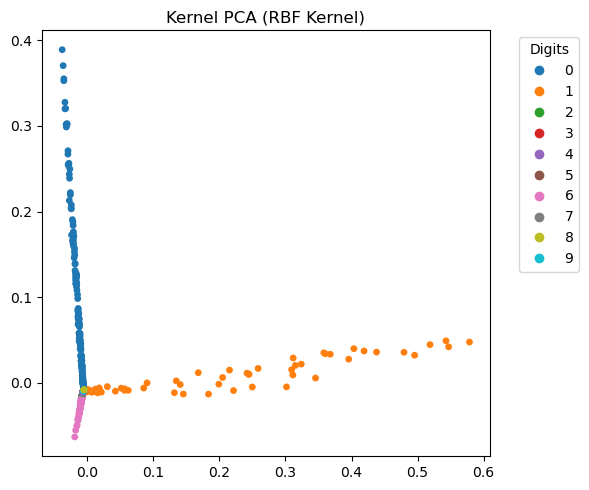

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


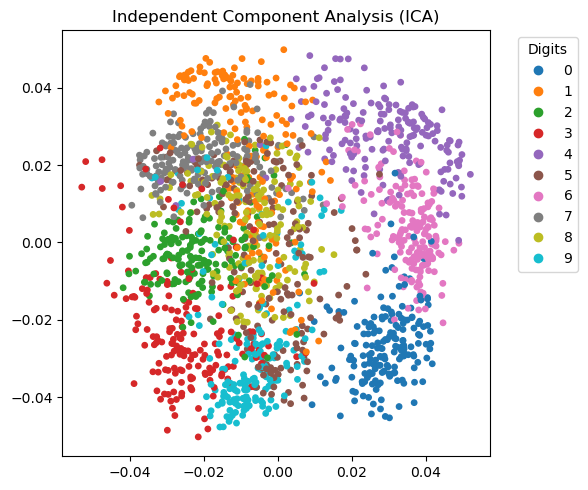

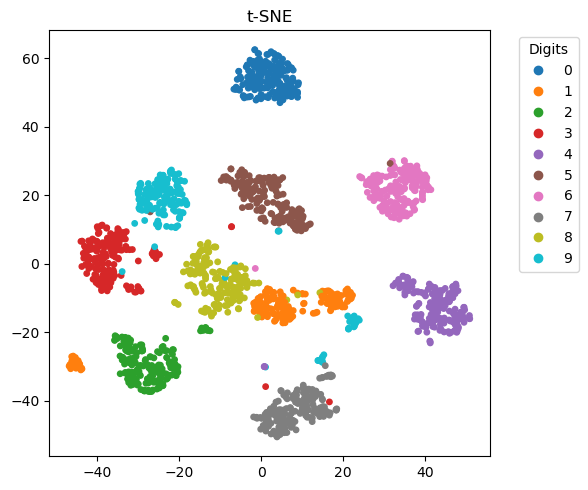

In [58]:
# Load digits dataset
digits = load_digits()
X_d = digits.data
y_d = digits.target

print("Shape of X:", X_d.shape)
print("Unique labels:", list(set(y_d)))

# Function to plot the 2D projection
def plot_projection(X, y, title):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10, s=15)
    plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)  # You can tune gamma
X_kpca = kpca.fit_transform(X_d)
plot_projection(X_kpca, y_d, "Kernel PCA (RBF Kernel)")

# Independent Component Analysis (ICA)
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_d)
plot_projection(X_ica, y_d, "Independent Component Analysis (ICA)")

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_d)
plot_projection(X_tsne, y_d, "t-SNE")

TSNE performs remarkably better than the other two methods.